Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Accuracy: 80.21 %


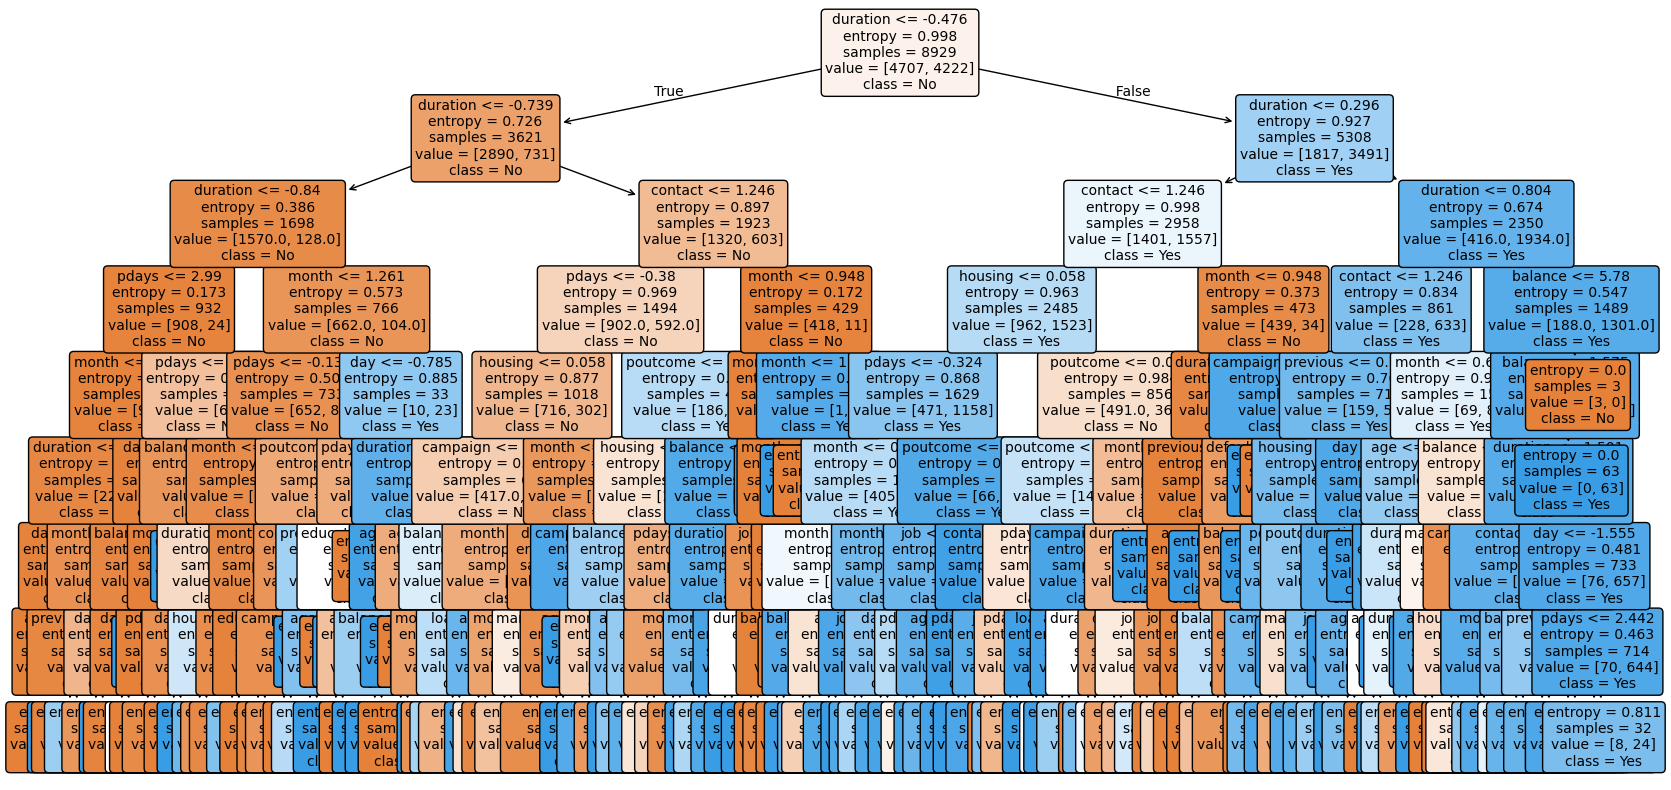

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('bank.csv')
df = df.dropna()

# Encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Change this to your actual target column (e.g., 'deposit' if not 'y')
X = df.drop('deposit', axis=1)
y = df['deposit']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree with tuning
param = {
    'max_depth': [4, 6, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param,
    cv=5
)

grid.fit(X_train, y_train)

# Evaluate accuracy
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Visualize tree
plt.figure(figsize=(20, 10))

tree.plot_tree(
    grid.best_estimator_,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()